In [1]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py
#importing all then necessary modules

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential

from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

from tensorflow.keras import backend as K


Using TensorFlow backend.
/home/ubuntu/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ubuntu/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ubuntu/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ubuntu/anaconda3/lib/python3.6/site-packages/tenso

In [2]:
batch_size = 128 
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

In [3]:
#Train and test split
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [5]:
print(y_train.shape)

(60000, 10)


In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty):
  fig = plt.figure( facecolor='y', edgecolor='k')
  plt.plot(x, vy, 'b', label="Validation Loss")
  plt.plot(x, ty, 'r', label="Train Loss")
  plt.xlabel('Epochs') 
  plt.ylabel('Categorical Crossentropy Loss')
  plt.legend()
  plt.grid()
  plt.show()

## 1 Model 1:CNN with 3 ConvNet & 3x3 kernel size


### Stack all the layers

In [7]:
from keras.initializers import he_normal

convnet3=Sequential() # Initializing the model

# First ConvNet
convnet3.add(Conv2D(32,kernel_size=(3,3),
                    activation='relu',
                    input_shape=input_shape))

convnet3.add(Conv2D(64,kernel_size=(3,3),
                    activation='relu'))

convnet3.add(Dropout(0.25))

convnet3.add(Conv2D(128,kernel_size=(3,3),
                   activation='relu'))
#maxpooling by (2,2 ) ,dropout,flattening
convnet3.add(MaxPooling2D(pool_size=(2,2)))
convnet3.add(Dropout(0.25))
convnet3.add(Flatten())

#hidden_layer
convnet3.add(Dense(256,
                   activation='relu',
                   kernel_initializer=he_normal(seed=None)))
convnet3.add(Dropout(0.5))
convnet3.add(Dense(num_classes,activation='softmax'))
print(convnet3.summary())


W0822 16:26:44.370091 139667507078976 deprecation_wrapper.py:119] From /home/ubuntu/anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0822 16:26:44.382181 139667507078976 deprecation_wrapper.py:119] From /home/ubuntu/anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0822 16:26:44.384397 139667507078976 deprecation_wrapper.py:119] From /home/ubuntu/anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0822 16:26:44.404672 139667507078976 deprecation_wrapper.py:119] From /home/ubuntu/anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placehold

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 11, 11, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 15488)             0         
__________

### Model compile and fit

In [8]:
#Model compilation
convnet3.compile(optimizer=keras.optimizers.Adam(),
                loss=keras.losses.categorical_crossentropy,
                metrics=['accuracy'])
convnet3_history=convnet3.fit(x_train,y_train,batch_size=batch_size,
                             epochs=epochs,
                             verbose=1,
                             validation_data=(x_test, y_test))

W0822 16:26:49.448583 139667507078976 deprecation_wrapper.py:119] From /home/ubuntu/anaconda3/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0822 16:26:49.554800 139667507078976 deprecation.py:323] From /home/ubuntu/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 159s 3ms/step - loss: 0.1732 - acc: 0.9469 - val_loss: 0.0385 - val_acc: 0.9878
Epoch 2/12
60000/60000 [==============================] - 145s 2ms/step - loss: 0.0592 - acc: 0.9818 - val_loss: 0.0319 - val_acc: 0.9886
Epoch 3/12
60000/60000 [==============================] - 143s 2ms/step - loss: 0.0431 - acc: 0.9866 - val_loss: 0.0273 - val_acc: 0.9910
Epoch 4/12
60000/60000 [==============================] - 142s 2ms/step - loss: 0.0360 - acc: 0.9887 - val_loss: 0.0222 - val_acc: 0.9930
Epoch 5/12
60000/60000 [==============================] - 143s 2ms/step - loss: 0.0290 - acc: 0.9911 - val_loss: 0.0234 - val_acc: 0.9931
Epoch 6/12
60000/60000 [==============================] - 142s 2ms/step - loss: 0.0249 - acc: 0.9922 - val_loss: 0.0285 - val_acc: 0.9910
Epoch 7/12
60000/60000 [==============================] - 141s 2ms/step - loss: 0.0216 - acc: 0.9931 - val_loss: 0.0251 - 

### Evaluating model 1

test score : 0.021412627242445616
test sccuracy : 0.9932


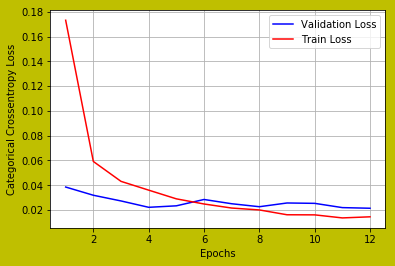

In [9]:
#evaluating model

score=convnet3.evaluate(x_test,y_test,verbose=0)
test_score3=score[0]
test_accuracy3=score[1]
train_accuracy3=max(convnet3_history.history['acc'])
print('test score :',test_score3)
print('test sccuracy :',test_accuracy3)
# error plot
x=list(range(1,epochs+1))
vy=convnet3_history.history['val_loss'] #validation loss
ty=convnet3_history.history['loss'] # train loss
plt_dynamic(x, vy, ty)

### Changing dropout layer to 0.5

### Stack all the layers

In [10]:
from keras.initializers import he_normal

convnet3=Sequential() # Initializing the model

# First ConvNet
convnet3.add(Conv2D(32,kernel_size=(3,3),
                    activation='relu',
                    input_shape=input_shape))

convnet3.add(Conv2D(64,kernel_size=(3,3),
                    activation='relu'))

convnet3.add(Dropout(0.5))

convnet3.add(Conv2D(128,kernel_size=(3,3),
                   activation='relu'))
#maxpooling by (2,2 ) ,dropout,flattening
convnet3.add(MaxPooling2D(pool_size=(2,2)))
convnet3.add(Dropout(0.5))
convnet3.add(Flatten())

#hidden_layer
convnet3.add(Dense(256,
                   activation='relu',
                   kernel_initializer=he_normal(seed=None)))
convnet3.add(Dropout(0.5))
convnet3.add(Dense(num_classes,activation='softmax'))
print(convnet3.summary())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout_4 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 11, 11, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 15488)             0         
__________

### Model compile and fit

In [11]:
#Model compilation
convnet3.compile(optimizer=keras.optimizers.Adam(),
                loss=keras.losses.categorical_crossentropy,
                metrics=['accuracy'])
convnet3_history=convnet3.fit(x_train,y_train,batch_size=batch_size,
                             epochs=epochs,
                             verbose=1,
                             validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 146s 2ms/step - loss: 0.2067 - acc: 0.9364 - val_loss: 0.0518 - val_acc: 0.9831
Epoch 2/12
60000/60000 [==============================] - 156s 3ms/step - loss: 0.0734 - acc: 0.9775 - val_loss: 0.0333 - val_acc: 0.9887
Epoch 3/12
60000/60000 [==============================] - 151s 3ms/step - loss: 0.0562 - acc: 0.9829 - val_loss: 0.0294 - val_acc: 0.9904
Epoch 4/12
60000/60000 [==============================] - 155s 3ms/step - loss: 0.0489 - acc: 0.9851 - val_loss: 0.0246 - val_acc: 0.9906
Epoch 5/12
60000/60000 [==============================] - 147s 2ms/step - loss: 0.0439 - acc: 0.9867 - val_loss: 0.0244 - val_acc: 0.9914
Epoch 6/12
60000/60000 [==============================] - 149s 2ms/step - loss: 0.0382 - acc: 0.9880 - val_loss: 0.0243 - val_acc: 0.9914
Epoch 7/12
60000/60000 [==============================] - 159s 3ms/step - loss: 0.0328 - acc: 0.9899 - val_loss: 0.0217 - 

## 2 Model2:CNN with 5 ConvNet & kernel_size=(5x5)


5 convNet  followed by maxpooling(2,2) and dropout

### Stack all the layers

In [15]:
#Model compilation
from datetime import datetime
start = datetime.now()
convnet5.compile(optimizer=keras.optimizers.Adam(),
                loss=keras.losses.categorical_crossentropy,
                metrics=['accuracy'])
convnet5_history=convnet5.fit(x_train,y_train,batch_size=batch_size,
                             epochs=epochs,
                             verbose=1,
                             validation_data=(x_test, y_test))
print("Time taken :", datetime.now() - start)

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 197s 3ms/step - loss: 2.0155 - acc: 0.3283 - val_loss: 1.2187 - val_acc: 0.5339
Epoch 2/12
60000/60000 [==============================] - 196s 3ms/step - loss: 0.8122 - acc: 0.7284 - val_loss: 0.5395 - val_acc: 0.8113
Epoch 3/12
60000/60000 [==============================] - 195s 3ms/step - loss: 0.4990 - acc: 0.8431 - val_loss: 0.2906 - val_acc: 0.9070
Epoch 4/12
60000/60000 [==============================] - 195s 3ms/step - loss: 0.3683 - acc: 0.8870 - val_loss: 0.2283 - val_acc: 0.9252
Epoch 5/12
60000/60000 [==============================] - 195s 3ms/step - loss: 0.2737 - acc: 0.9175 - val_loss: 0.1676 - val_acc: 0.9442
Epoch 6/12
60000/60000 [==============================] - 197s 3ms/step - loss: 0.3061 - acc: 0.9074 - val_loss: 0.2101 - val_acc: 0.9360
Epoch 7/12
60000/60000 [==============================] - 217s 4ms/step - loss: 0.2533 - acc: 0.9240 - val_loss: 0.1378 - 

### Model compile and fit

In [13]:
from keras.layers.normalization import BatchNormalization
convnet5=Sequential() # Initializing the model

# First ConvNet
convnet5.add(Conv2D(32,kernel_size=(5,5),
                    activation='relu',
                    padding='same',
                    input_shape=input_shape))

convnet5.add(Conv2D(64,kernel_size=(5,5),
                    padding='same',
                    activation='relu'))#Second Convnet
convnet5.add(MaxPooling2D(pool_size=(2,2)))
convnet5.add(Dropout(0.25))

convnet5.add(Conv2D(96,kernel_size=(5,5),
                    padding='same',
                   activation='relu'))  # 3rd ConvNet
#maxpooling by (2,2 ) ,dropout,flattening
convnet5.add(MaxPooling2D(pool_size=(2,2)))
convnet5.add(Dropout(0.25))

convnet5.add(Conv2D(128,kernel_size=(5,5),
                    padding='same',
                    activation='relu'))#fourth Convnet
convnet5.add(MaxPooling2D(pool_size=(2,2)))
convnet5.add(Dropout(0.25))
convnet5.add(Conv2D(164,kernel_size=(5,5),
                    padding='same',
                    activation='relu'))#fifth Convnet
convnet5.add(MaxPooling2D(pool_size=(2,2)))
convnet5.add(Dropout(0.25))
convnet5.add(Flatten())

#hidden_layer
convnet5.add(Dense(256,
                   activation='relu',
                   kernel_initializer=he_normal(seed=None)))
convnet5.add(BatchNormalization())
convnet5.add(Dropout(0.5))
convnet5.add(Dense(num_classes,activation='softmax'))
print(convnet5.summary())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 28, 28, 64)        51264     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 14, 14, 96)        153696    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 96)          0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 7, 7, 96)          0         
__________

### Evalutating Model 2

test score : 0.03953570005786605
test Accuracy : 0.9876


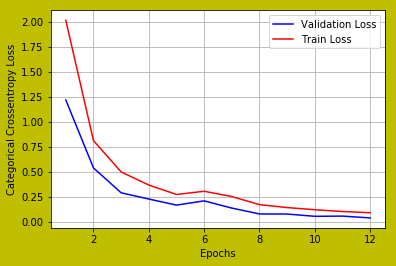

In [16]:
#evaluating model
score=convnet5.evaluate(x_test,y_test,verbose=0)
test_score5=score[0]
test_accuracy5=score[1]
train_accuracy5=max(convnet5_history.history['acc'])
print('test score :',test_score5)
print('test Accuracy :',test_accuracy5)
# error plot
x=list(range(1,epochs+1))
vy=convnet5_history.history['val_loss'] #validation loss
ty=convnet5_history.history['loss'] # train loss
plt_dynamic(x, vy, ty)





## 3 Model3:CNN with 7 ConvNet & kernel_size=(2x2)


5 convNet  followed by maxpooling(2,2) and dropout

### Stack all the layers

In [17]:
convnet7=Sequential() # Initializing the model

# First ConvNet
convnet7.add(Conv2D(16,kernel_size=(2,2),
                    activation='relu',
                    padding='same',strides=(1,1),
                    input_shape=input_shape))


convnet7.add(Conv2D(32,kernel_size=(2,2),
                    padding='same',strides=(2,2),
                    activation='relu'))#Second Convnet
#convnet7.add(MaxPooling2D(pool_size=(2,2)))
#convnet7.add(Dropout(0.25))

convnet7.add(Conv2D(64,kernel_size=(2,2),
                    padding='same',
                   activation='relu'))  # 3rd ConvNet
#maxpooling by (2,2 ) ,dropout,flattening
#convnet7.add(MaxPooling2D(pool_size=(2,2)))
convnet7.add(Dropout(0.15))

convnet7.add(Conv2D(96,kernel_size=(2,2),
                    padding='same',
                    activation='relu'))#fourth Convnet
convnet7.add(MaxPooling2D(pool_size=(2,2)))
convnet7.add(Dropout(0.39))
convnet7.add(Conv2D(128,kernel_size=(2,2),
                    padding='same',
                    activation='relu'))#fifth Convnet
convnet7.add(MaxPooling2D(pool_size=(2,2)))
convnet7.add(Dropout(0.3))
convnet7.add(Conv2D(164,kernel_size=(2,2),
                    padding='same',
                    activation='relu'))#sixth Convnet
convnet7.add(Conv2D(164,kernel_size=(2,2),
                    padding='same',strides=(1,1),
                    activation='relu'))#seventh Convnet

convnet7.add(MaxPooling2D(pool_size=(2,2)))
convnet7.add(Dropout(0.4))
convnet7.add(Flatten())

#hidden_layer
convnet7.add(Dense(256,
                   activation='relu',
                   kernel_initializer=he_normal(seed=None)))#1 hidden layer
convnet7.add(BatchNormalization())
convnet7.add(Dropout(0.5))
convnet7.add(Dense(148,
                   activation='relu',
                   kernel_initializer=he_normal(seed=None)))#2 hidden layer
convnet7.add(BatchNormalization())
convnet7.add(Dropout(0.5))
convnet7.add(Dense(128,
                   activation='relu',
                   kernel_initializer=he_normal(seed=None)))#3 hidden layer
convnet7.add(BatchNormalization())
convnet7.add(Dropout(0.5))
convnet7.add(Dense(num_classes,activation='softmax'))
print(convnet7.summary())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 28, 28, 16)        80        
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 14, 14, 32)        2080      
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 14, 14, 64)        8256      
_________________________________________________________________
dropout_16 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 14, 14, 96)        24672     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 7, 7, 96)          0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 7, 7, 96)          0         
__________

### Model compile and fit

In [18]:
start=datetime.now()
convnet7.compile(optimizer=keras.optimizers.Adam(),
                loss=keras.losses.categorical_crossentropy,
                metrics=['accuracy'])
convnet7_history=convnet7.fit(x_train,y_train,batch_size=batch_size,
                             epochs=epochs,
                             verbose=1,
                             validation_data=(x_test, y_test))
print("Time taken :", datetime.now() - start)

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 42s 708us/step - loss: 1.8053 - acc: 0.4127 - val_loss: 0.7215 - val_acc: 0.7612
Epoch 2/12
60000/60000 [==============================] - 39s 655us/step - loss: 0.3991 - acc: 0.8855 - val_loss: 0.1137 - val_acc: 0.9732
Epoch 3/12
60000/60000 [==============================] - 40s 664us/step - loss: 0.1916 - acc: 0.9501 - val_loss: 0.0509 - val_acc: 0.9869
Epoch 4/12
60000/60000 [==============================] - 44s 738us/step - loss: 0.1405 - acc: 0.9647 - val_loss: 0.0498 - val_acc: 0.9869
Epoch 5/12
60000/60000 [==============================] - 44s 737us/step - loss: 0.1177 - acc: 0.9714 - val_loss: 0.0368 - val_acc: 0.9905
Epoch 6/12
60000/60000 [==============================] - 44s 732us/step - loss: 0.1013 - acc: 0.9755 - val_loss: 0.0398 - val_acc: 0.9906
Epoch 7/12
60000/60000 [==============================] - 43s 713us/step - loss: 0.0841 - acc: 0.9792 - val_loss: 0.

### Evaluating Model 3

test score : 0.031180126290989575
test Accuracy : 0.9929


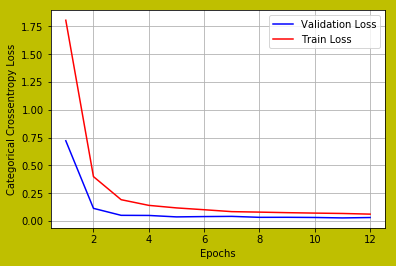

In [19]:
#evaluating model
score=convnet7.evaluate(x_test,y_test,verbose=0)
test_score7=score[0]
test_accuracy7=score[1]
train_accuracy7=max(convnet7_history.history['acc'])
print('test score :',test_score7)
print('test Accuracy :',test_accuracy7)
# error plot
x=list(range(1,epochs+1))
vy=convnet7_history.history['val_loss'] #validation loss
ty=convnet7_history.history['loss'] # train loss
plt_dynamic(x, vy, ty)

### Summarizing the performance of all the above models using PrettyTable

In [20]:
from prettytable import PrettyTable
models=['3ConvNet with kernel 3x3',
        '5ConvNet with kernel 5x5',
        '7ConvNet with kernel 2x2']
training_accuracy=[train_accuracy3,train_accuracy5,train_accuracy7]
test_accuracy=[test_accuracy3,test_accuracy5,test_accuracy7]
INDEX = [1,2,3]
# Initializing prettytable
Model_Performance = PrettyTable()
# Adding columns
Model_Performance.add_column("INDEX.",INDEX)
Model_Performance.add_column("MODEL_NAME",models)
Model_Performance.add_column("TRAINING ACCURACY",training_accuracy)
Model_Performance.add_column("TESTING ACCURACY",test_accuracy)


# Printing the Model_Performance
print(Model_Performance)
     

+--------+--------------------------+--------------------+------------------+
| INDEX. |        MODEL_NAME        | TRAINING ACCURACY  | TESTING ACCURACY |
+--------+--------------------------+--------------------+------------------+
|   1    | 3ConvNet with kernel 3x3 | 0.9954499999682108 |      0.9932      |
|   2    | 5ConvNet with kernel 5x5 | 0.9727000000317891 |      0.9876      |
|   3    | 7ConvNet with kernel 2x2 |       0.9852       |      0.9929      |
+--------+--------------------------+--------------------+------------------+


### Conclusions

- From the Validation/Test accuracy scores,we can find that model 1 has performed slighly better than model 3
- Model 2 took the longest for training as compared to Model 1 and Model 3
- Model 3 took the least amount of time to train